### **Support Ticket Classification using TF-IDF Vectorization**

**Scenario:**

In every organization, IT and customer support teams deal with an overwhelming number of support tickets daily. A significant challenge faced by these teams is misclassification of ticket priorities—employees often raise tickets as Priority-1 (P1) or Priority-2 (P2), even when they do not require urgent attention. This leads to inefficiencies, delays, and misallocation of resources.

Thus proposing a machine learning-based predictive model that can automatically classify incoming support tickets into appropriate priority levels (P1, P2, P3, etc.) based on their content. This automation can help IT teams focus on truly critical issues first, improving response times and operational efficiency.

**Objective**:

The goal of this case study is to develop a text classification model that can analyze the content of a ticket description and accurately predict its priority level. This involves:

- Preprocessing and vectorizing text data to make it suitable for machine learning.

- Training classification models such as Logistic Regression, Decision Trees, and Naïve Bayes.

- Evaluating model performance using metrics like accuracy, precision, recall, and F1-score.

- Deploying the model via an API or web interface for real-time ticket classification.

In [1]:
### Creating a sample ticket data
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

TicketData=pd.DataFrame(data=[['Hi Please reset my password, i am not able to reset it','P3'],
                              ['Hi Please reset my password','P3'],
                              ['Hi The system is down please restart it', 'P1'],
                              ['Not able to login can you check?', 'P3'],
                              ['The data is not getting exported', 'P2'],
                               ], columns=['Text','Priority'])
# Printing the data
print(TicketData)

                                                Text Priority
0  Hi Please reset my password, i am not able to ...       P3
1                        Hi Please reset my password       P3
2            Hi The system is down please restart it       P1
3                   Not able to login can you check?       P3
4                   The data is not getting exported       P2


#### **Observations & Challenges**


1. **Text Data Requires Transformation**

Traditional classification models work with numerical data, but ticket descriptions are in free-text format. This necessitates a transformation process called Vectorization, which converts text into numerical form.

2. **Commonly Used Vectorization Techniques**

There are several methods to represent text numerically, including:

- TF-IDF (Term Frequency-Inverse Document Frequency)

- Word2Vec & Doc2Vec

- GloVe (Global Vectors for Word Representation)

- BERT (Bidirectional Encoder Representations from Transformers)

For this case study, we use TF-IDF vectorization, which measures how important a word is in a document relative to a collection of documents.

#### **Understanding TF-IDF**

TF-IDF is a statistical measure that evaluates how relevant a word is in a given document. It is computed as:

- Term Frequency (TF):  **(Number of times a word appears in a document/ Total words in the document)**


- Inverse Document Frequency (IDF):  **log(Total number of documents/Number of documents containing the word)**


#### **Key observations from TF-IDF:**

- Frequently occurring words like "the", "and", "is" have a lower weight.

- Rare words have higher TF-IDF scores, making them more relevant in distinguishing documents.

#### **Applying TF-IDF to Ticket Classification**
Using sklearn.feature_extraction.text.TfidfVectorizer, we transform our ticket descriptions into a Document-Term Matrix (DTM) where each row represents a ticket and each column represents a unique word with its corresponding TF-IDF score.

This matrix serves as the input for classification models, where the ticket priority (P1, P2, P3) becomes the target variable.

In [7]:
# Tf-IDF vectorization of text
from sklearn.feature_extraction.text import TfidfVectorizer

# Extracting only the ticket text column
corpus=TicketData['Text'].values

# Generating the Vectorizer object
vectorizer=TfidfVectorizer(stop_words='english')

# Converting the input text to TF-IDF matrix
X=vectorizer.fit_transform(corpus)

# Selecting final works in the TF-IDF matrix
print(vectorizer.get_feature_names_out())

['able' 'check' 'data' 'exported' 'getting' 'hi' 'login' 'password'
 'reset' 'restart']


In [12]:
# Visualizing the Document Term Matrix using TF-IDF
import pandas as pd
VectorizedText=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
VectorizedText['originalText']=pd.Series(corpus)
VectorizedText

,able,check,data,exported,getting,hi,login,password,reset,restart,originalText
0,0.386650,0.000000,0.00000,0.00000,0.00000,0.320954,0.000000,0.386650,0.773300,0.000000,"Hi Please reset my password, i am not able to ..."
1,0.000000,0.000000,0.00000,0.00000,0.00000,0.506204,0.000000,0.609818,0.609818,0.000000,Hi Please reset my password
2,0.000000,0.000000,0.00000,0.00000,0.00000,0.556451,0.000000,0.000000,0.000000,0.830881,Hi The system is down please restart it
3,0.495524,0.614189,0.00000,0.00000,0.00000,0.000000,0.614189,0.000000,0.000000,0.000000,Not able to login can you check?
4,0.000000,0.000000,0.57735,0.57735,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,The data is not getting exported


If a word,
- Not present in a sentences, its score is 0
- Present only in a few of the sentences, then its score is higher
- Present in almost every sentence, its score is 0.


Usecases of Vectorized text,
- This data can be futher used in ML
- If the text data also has a target variable e.g. Sentiment(positive/negative) or Support Ticker Priority (P1, P2, P3) then the word columns acts as predictors and can fit classification/regression ML algorithms on this data.

In [15]:
# Priority column acts as a target variable and other columns as predictors
DataForML=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
DataForML['Prioirty']=TicketData['Priority']
DataForML.head()

,able,check,data,exported,getting,hi,login,password,reset,restart,Prioirty
0,0.386650,0.000000,0.00000,0.00000,0.00000,0.320954,0.000000,0.386650,0.773300,0.000000,P3
1,0.000000,0.000000,0.00000,0.00000,0.00000,0.506204,0.000000,0.609818,0.609818,0.000000,P3
2,0.000000,0.000000,0.00000,0.00000,0.00000,0.556451,0.000000,0.000000,0.000000,0.830881,P1
3,0.495524,0.614189,0.00000,0.00000,0.00000,0.000000,0.614189,0.000000,0.000000,0.000000,P3
4,0.000000,0.000000,0.57735,0.57735,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,P2


**Problem Statement :** Use the support ticket text description to classify a new ticket into P1/P2/P3.

In [27]:
import pandas as pd
import numpy as np

# TicketData
TicketData=pd.read_csv('../Datasets/supportTicketData.csv')

# Number of rows and columns
print("Shape of the dataset:",TicketData.shape)

# Printing sample rows
TicketData.head(10)

Shape of the dataset: (19796, 2)


,body,urgency
0,connection issues with assigned address hi fac...,P1
1,cannot access hi cannot access fallowing link ...,P2
2,re address shown valid dear colleagues remarke...,P1
3,sent tuesday critical alert following alert oc...,P2
4,code spelling mistake hello should discover fo...,P2
5,annual leave hello sent last week about previo...,P2
6,report working hello dear last two weeks have ...,P2
7,more access lost access please reset password ...,P1
8,open credentials required please assist instal...,P1
9,dear please ask our supplier for price quotati...,P2


#### **Visualizing the distribution of the Target Variable**

urgency
P1    6748
P2    5528
P3    7520
dtype: int64


<Axes: xlabel='urgency'>

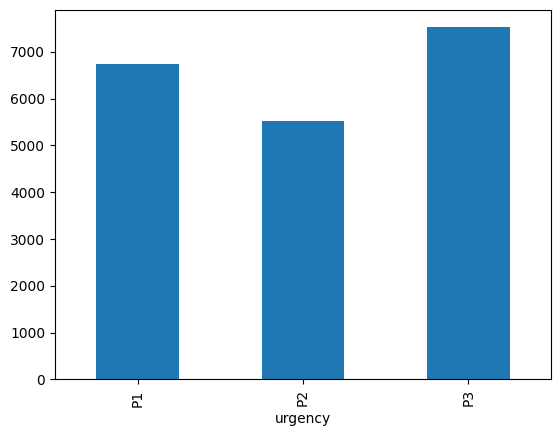

In [17]:
# Checking the count of each unique values for urgency column
print(TicketData.groupby('urgency').size())

# PLotting the bar chart
%matplotlib inline
TicketData.groupby('urgency').size().plot(kind='bar')

The data looks balanced in terms of having comparable numbers of Priority tasks, hence its balanced data for classification. 

#### **TF-IDF Vectorization: Converting text data to numberic**

In [19]:
# TF-IDF vectorization of text
from sklearn.feature_extraction.text import TfidfVectorizer

# Ticket Data
corpus=TicketData['body'].values

# Creating the vectorizer
vectorizer=TfidfVectorizer(stop_words='english')

# Converting text data into numeric data
X=vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out())

['ab' 'abandon' 'abandoned' ... 'zones' 'zoom' 'zooming']


Preparing DataFrame for ML, where
- Priority column -> target variable 
- Rest -> predictors

In [28]:
DataForML=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
DataForML['Priority']=TicketData['urgency']
print("Shape of Dataframe after vectorizer:",DataForML.shape)
DataForML.head()

Shape of Dataframe after vectorizer: (19796, 9100)


,ab,abandon,abandoned,abc,abeam,abilities,ability,able,abnormal,abnormally,...,zig,zip,zipped,zipper,zipping,zone,zones,zoom,zooming,Priority
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P2


9100 represents the 9099 unique words in the support ticket texts even after removing the stop-words + Target variable "Priority"

- To select the best number of principle components, we run PCA once with the number of components equal to the number of columns, here 9099.

- Taking 5000 as maximum Principle Components, to check if the optimum number of components can be found below 5000 or not

[ 1.28  2.25  3.08 ... 95.36 95.36 95.36]


Text(0, 0.5, '% Variance explained')

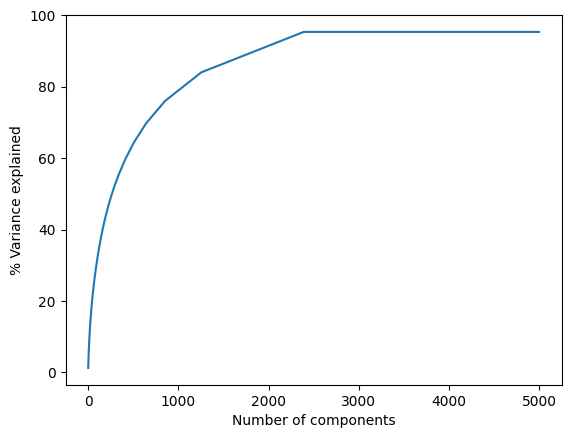

In [29]:
#### Decomposition Reduction

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Subsetting data for X and y
TargetVariable=DataForML.columns[-1]
Predictors=DataForML.columns[:-1]

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

# Trying maximum 5000 components
NumComponents=5000
pca=PCA(n_components=NumComponents)

# Fitting the data
pca_fit=pca.fit(X)

# Calculating the principle components
reduced_X=pca_fit.transform(X)

# Cummulative Variance explained by explained by each components
var_explained_cummulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_explained_cummulative)

# Look for the elbow in the plot
plt.plot(range(1, len(var_explained_cummulative)+1), var_explained_cummulative)
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

- Saturation is happening around 2100 principle components, explaining around 97% of total data variance

- Thus choosing 2100 Principle components, thus able to reduce the total number of columns significantly compared to original 9099 predictor columns.

In [32]:
# Creating 2100 Principle components based on the above curve
NumComponents=2100
pca=PCA(n_components=NumComponents)

# Fitting the data
pca_fit=pca.fit(X)

# Calculating the principle components
reduced_X=pca_fit.transform(X)

### Using Principal Components as predictors

Combining the Target Variable with the principle components and preparing the data for machine learning.

In [31]:
# Equating reduced_X to X
X=reduced_X

# Generating Predictor names
Predictors=pd.Series(['PC']*NumComponents).str.cat(pd.Series(range(1, NumComponents+1)).apply(str)).values
Predictors

array(['PC1', 'PC2', 'PC3', ..., 'PC2098', 'PC2099', 'PC2100'],
      dtype=object)

### Standardization/ Normalization of the data

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Using MinMaxScaler
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13857, 5000)
(13857,)
(5939, 5000)
(5939,)


### Training ML Classification Models


Using algorithms:

- Naive Bayes
- Logistic Regression
- Decision Trees

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is preferred in Binomial Classification
# Multinomial is preferred in multi-class Classification
clf=GaussianNB()
# clf=MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

# Generating the Naive Bayes model
NB=clf.fit(X_train, y_train)

# Generating predictions on testing data
Prediction=NB.predict(X_test)

# Printing sample values of prediction in Testing Data
TestingData=pd.DataFrame(data=X_test, columns=Predictors)



GaussianNB()
